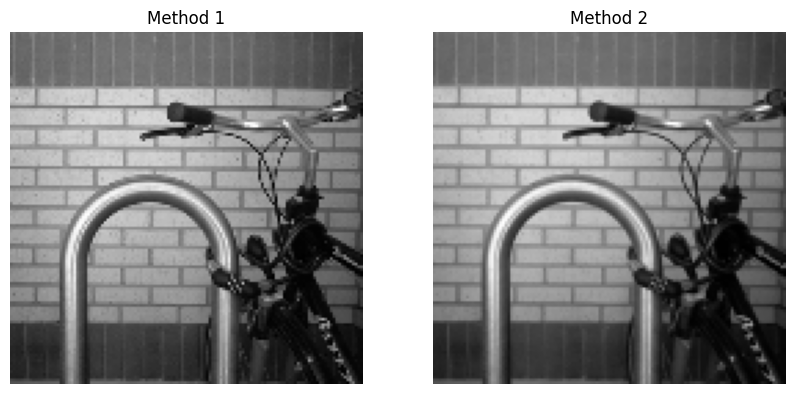

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# === Load test image ===
img = np.array(Image.open('croppedBike.png').convert('L'), dtype=float) / 255.0
row, col = img.shape

# === Perform subsampling by matrix multiplication ===
a = np.eye(int(row / 2))
b = np.array([[1], [0]])
c = np.array([[0.5], [0.5]])

H1 = np.kron(a, b)
H2 = np.kron(a, c)

subImg1 = H1.T @ img @ H1
subImg2 = H2.T @ img @ H2

# === Show images ===
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(subImg1, cmap='gray')
plt.title('Method 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(subImg2, cmap='gray')
plt.title('Method 2')
plt.axis('off')

plt.show()

# === Save images ===
Image.fromarray((subImg1 * 255).astype(np.uint8)).save('Subsampling_subsample_1.png')
Image.fromarray((subImg2 * 255).astype(np.uint8)).save('Subsampling_subsample_2.png')
